In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail
import requests
from nba_api.stats.static.players import find_players_by_full_name
from adjustText import adjust_text
from io import BytesIO
import time
import tqdm

from PIL import Image

In [4]:
from nba_api.stats.static.players import get_active_players
from nba_api.stats.endpoints.leaguedashplayerstats import LeagueDashPlayerStats

In [5]:
player_stats = LeagueDashPlayerStats()
stats_df = player_stats.get_data_frames()[0]

In [72]:
for index in tqdm.tqdm(range(len(stats_df))):
    item = stats_df.iloc[index]
    team_id = item.TEAM_ID
    player_id = item.PLAYER_ID
    url = f"https://ak-static.cms.nba.com/wp-content/uploads/headshots/nba/{team_id}/2020/260x190/{player_id}.png"
    response = requests.get(url)
    if response.status_code != 200:
        url = f"https://cdn.nba.com/headshots/nba/latest/1040x760/{player_id}.png"
        response = requests.get(url)
    #img = Image.open(BytesIO(response.content))
    with open(f'player_imgs/{player_id}.png', 'wb') as f:
        f.write(response.content)
    time.sleep(0.05)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 474/474 [04:50<00:00,  1.63it/s]


In [78]:
for index in tqdm.tqdm(range(len(stats_df))):
    item = stats_df.iloc[index]
    team_id = item.TEAM_ID
    player_id = item.PLAYER_ID
    img = Image.open(f'player_imgs/{player_id}.png')
    if img.size[0] < 400:
        continue
    url = f"https://ak-static.cms.nba.com/wp-content/uploads/headshots/nba/{team_id}/2020/260x190/{player_id}.png"
    response = requests.get(url)
    if response.status_code != 200:
        url = f"https://cdn.nba.com/headshots/nba/latest/260x190/{player_id}.png"
        response = requests.get(url)
    #img = Image.open(BytesIO(response.content))
    with open(f'player_imgs/{player_id}.png', 'wb') as f:
        f.write(response.content)
    time.sleep(0.05)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 474/474 [00:34<00:00, 13.76it/s]


In [16]:
import os

In [19]:
players = [f'player_imgs/{item}' for item in os.listdir('player_imgs')[:10]]

In [23]:
x = np.random.randint(low=0, high=10, size=len(players))
y = np.random.randint(low=0, high=10, size=len(players))

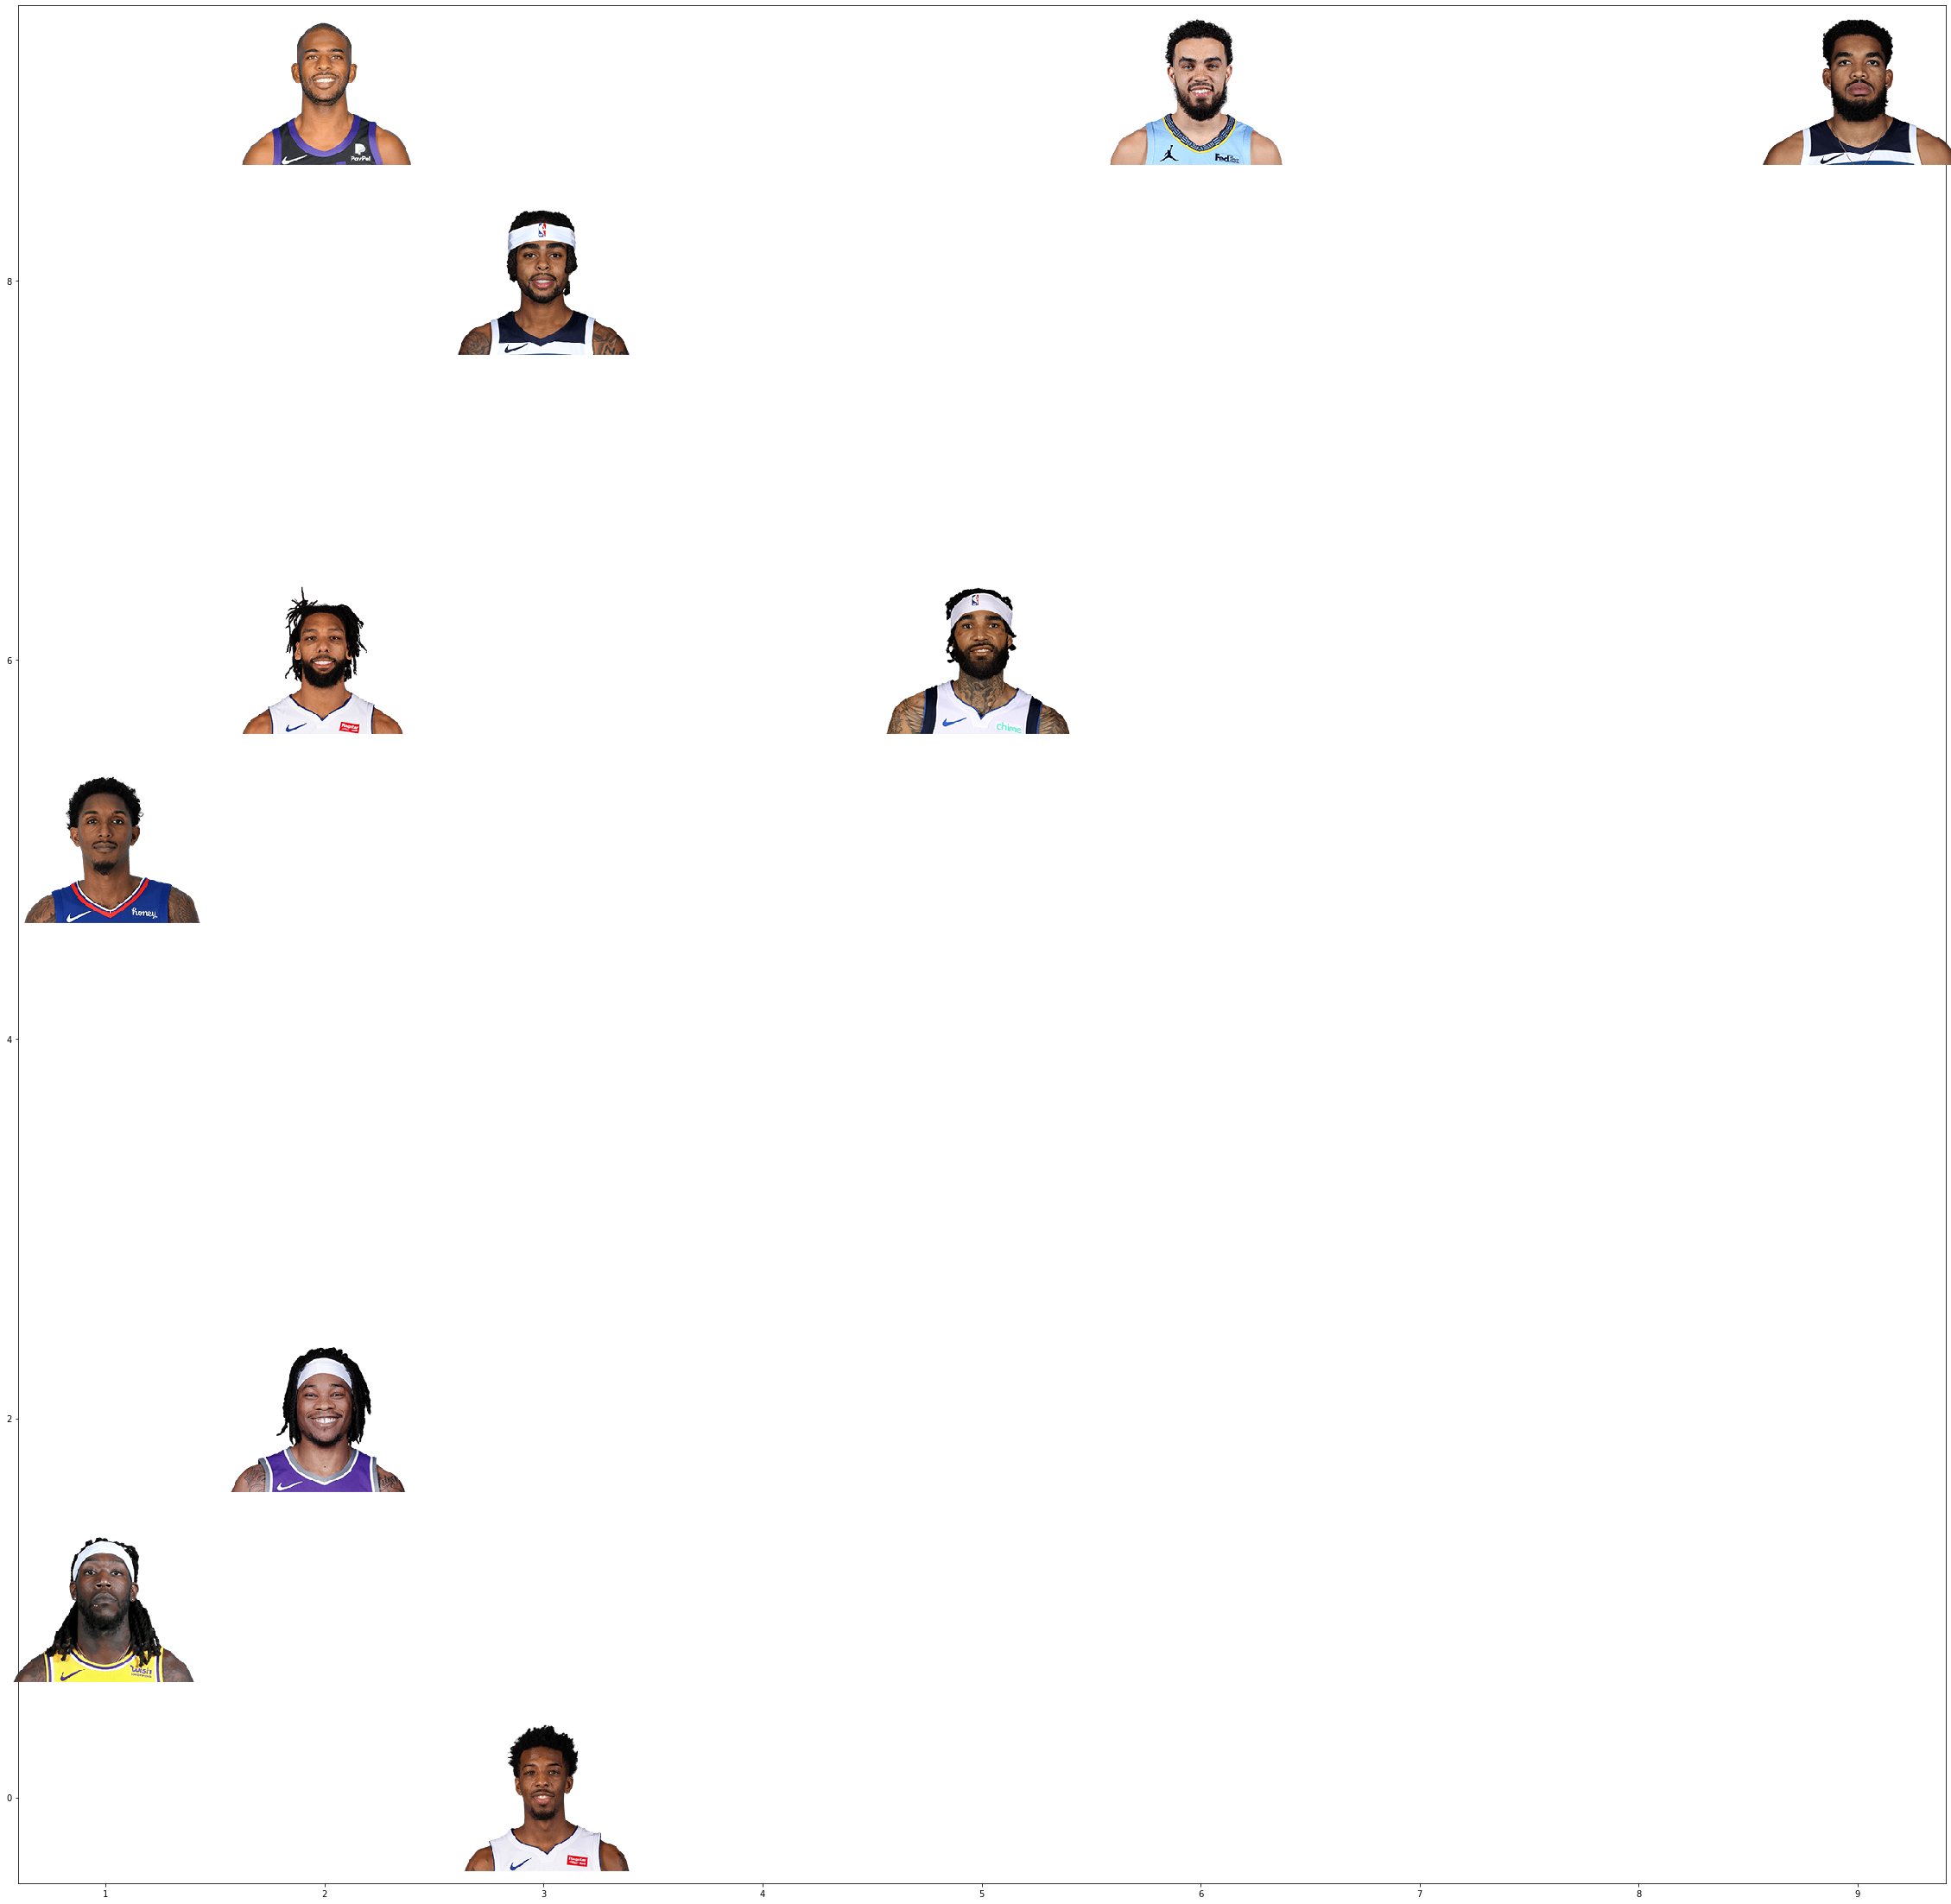

In [35]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def getImage(path):
    return OffsetImage(plt.imread(path), zoom=0.9)

paths = players


fig, ax = plt.subplots(figsize=(40, 40))
ax.scatter(x, y) 

for x0, y0, path in zip(x, y, paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)

In [36]:
plt.style.use('fivethirtyeight')

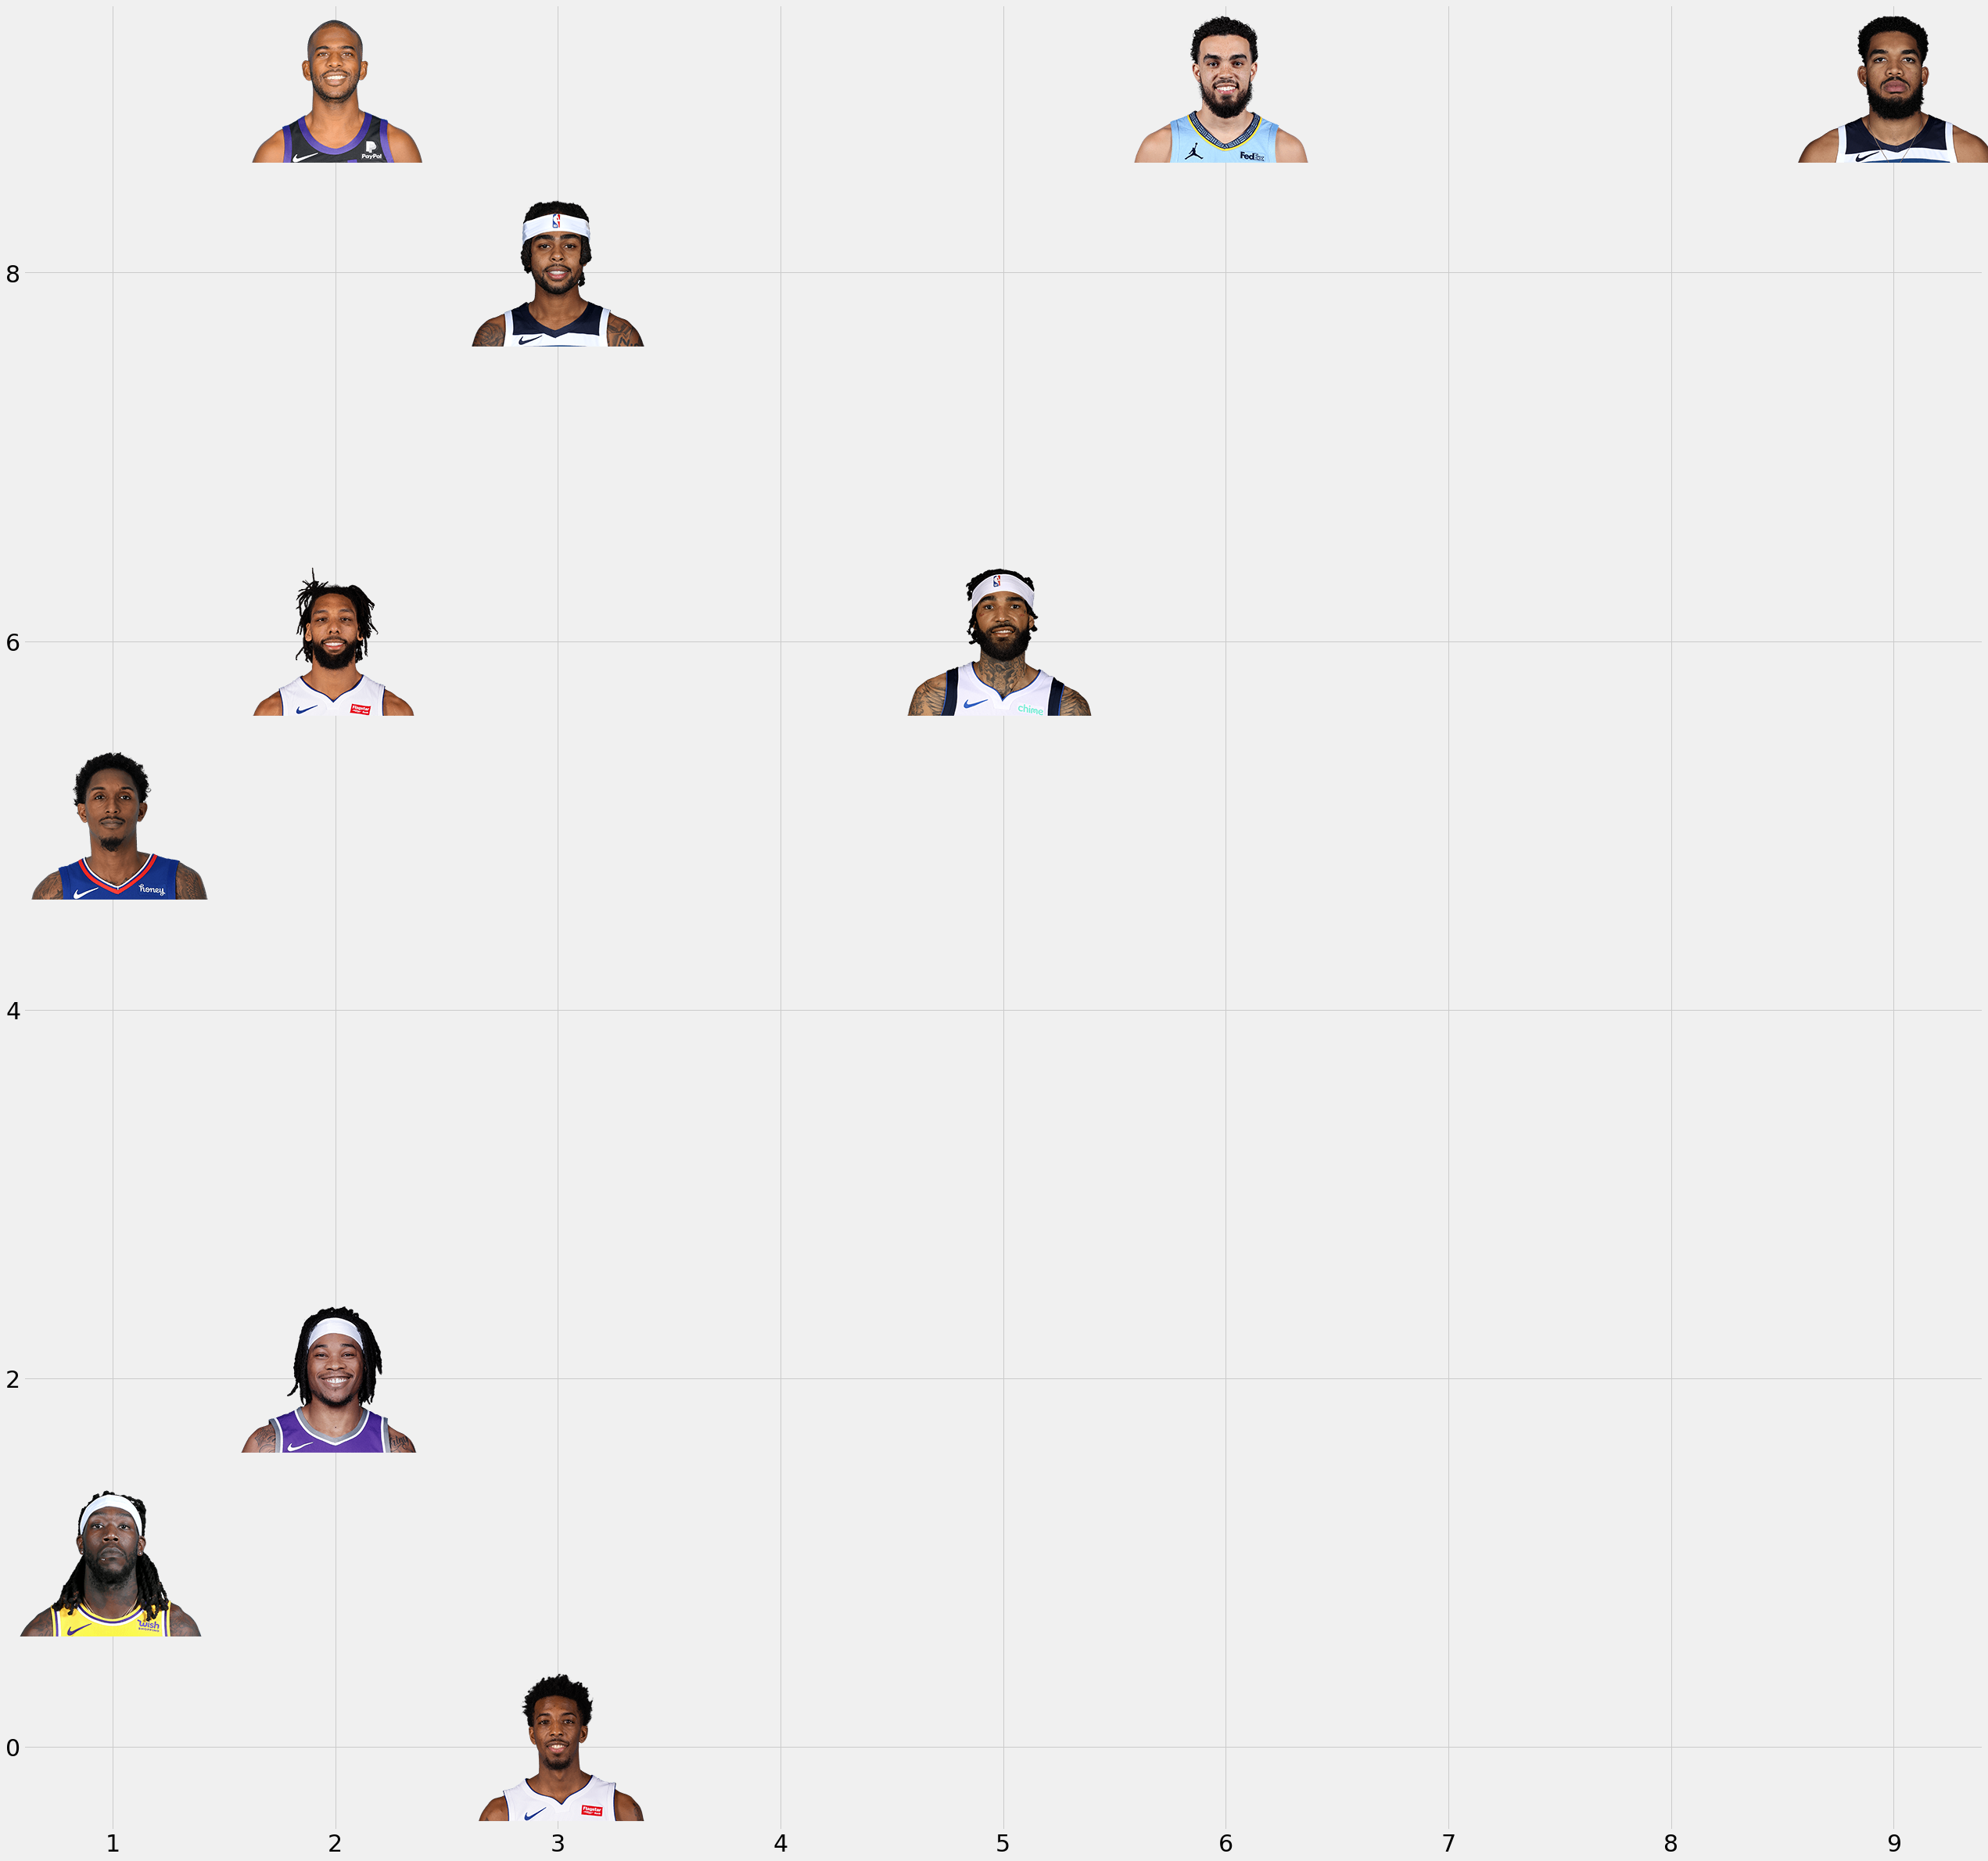

In [42]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def getImage(path):
    return OffsetImage(plt.imread(path), zoom=1.0)

paths = players

fig, ax = plt.subplots(figsize=(40, 40))
ax.scatter(x, y) 
ax.tick_params(labelsize=30)

for x0, y0, path in zip(x, y, paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)

In [41]:
from nba_api.stats.endpoints.synergyplaytypes import SynergyPlayTypes

In [50]:
url = "https://stats.nba.com/stats/synergyplaytypes?LeagueID=00&PerMode=PerGame&PlayType=Postup&PlayerOrTeam=P&SeasonType=Regular+Season&SeasonYear=2020-21&TypeGrouping=offensive"


In [51]:
headers= {
    'Host': 'stats.nba.com', 
    'Connection': 'keep-alive', 
    'Accept': 'application/json, text/plain, */*', 
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.97 Safari/537.36', 
    'Referer': 'https://stats.nba.com/', 
    'Accept-Encoding': 'gzip, deflate, br', 
    'Accept-Language': 'en-US,en;q=0.9',
    'x-nba-stats-origin': 'stats',
    'x-nba-stats-token': 'true',
}

In [52]:
resp = requests.get(url, headers=headers)

In [45]:
postup = SynergyPlayTypes(per_mode_simple='PerGame', play_type_nullable='Postup', player_or_team_abbreviation='P', season='2020-21', )
data_df = postup.get_data_frames()[0]

In [57]:
data_df = pd.DataFrame(data=resp.json()['resultSets'][0]['rowSet'], columns=resp.json()['resultSets'][0]['headers'])

In [80]:
bball_gray = '#312f30'
bball_white = '#dddee0'
bball_orange = '#f87c24'
bball_light_orange = '#fbaf7b'

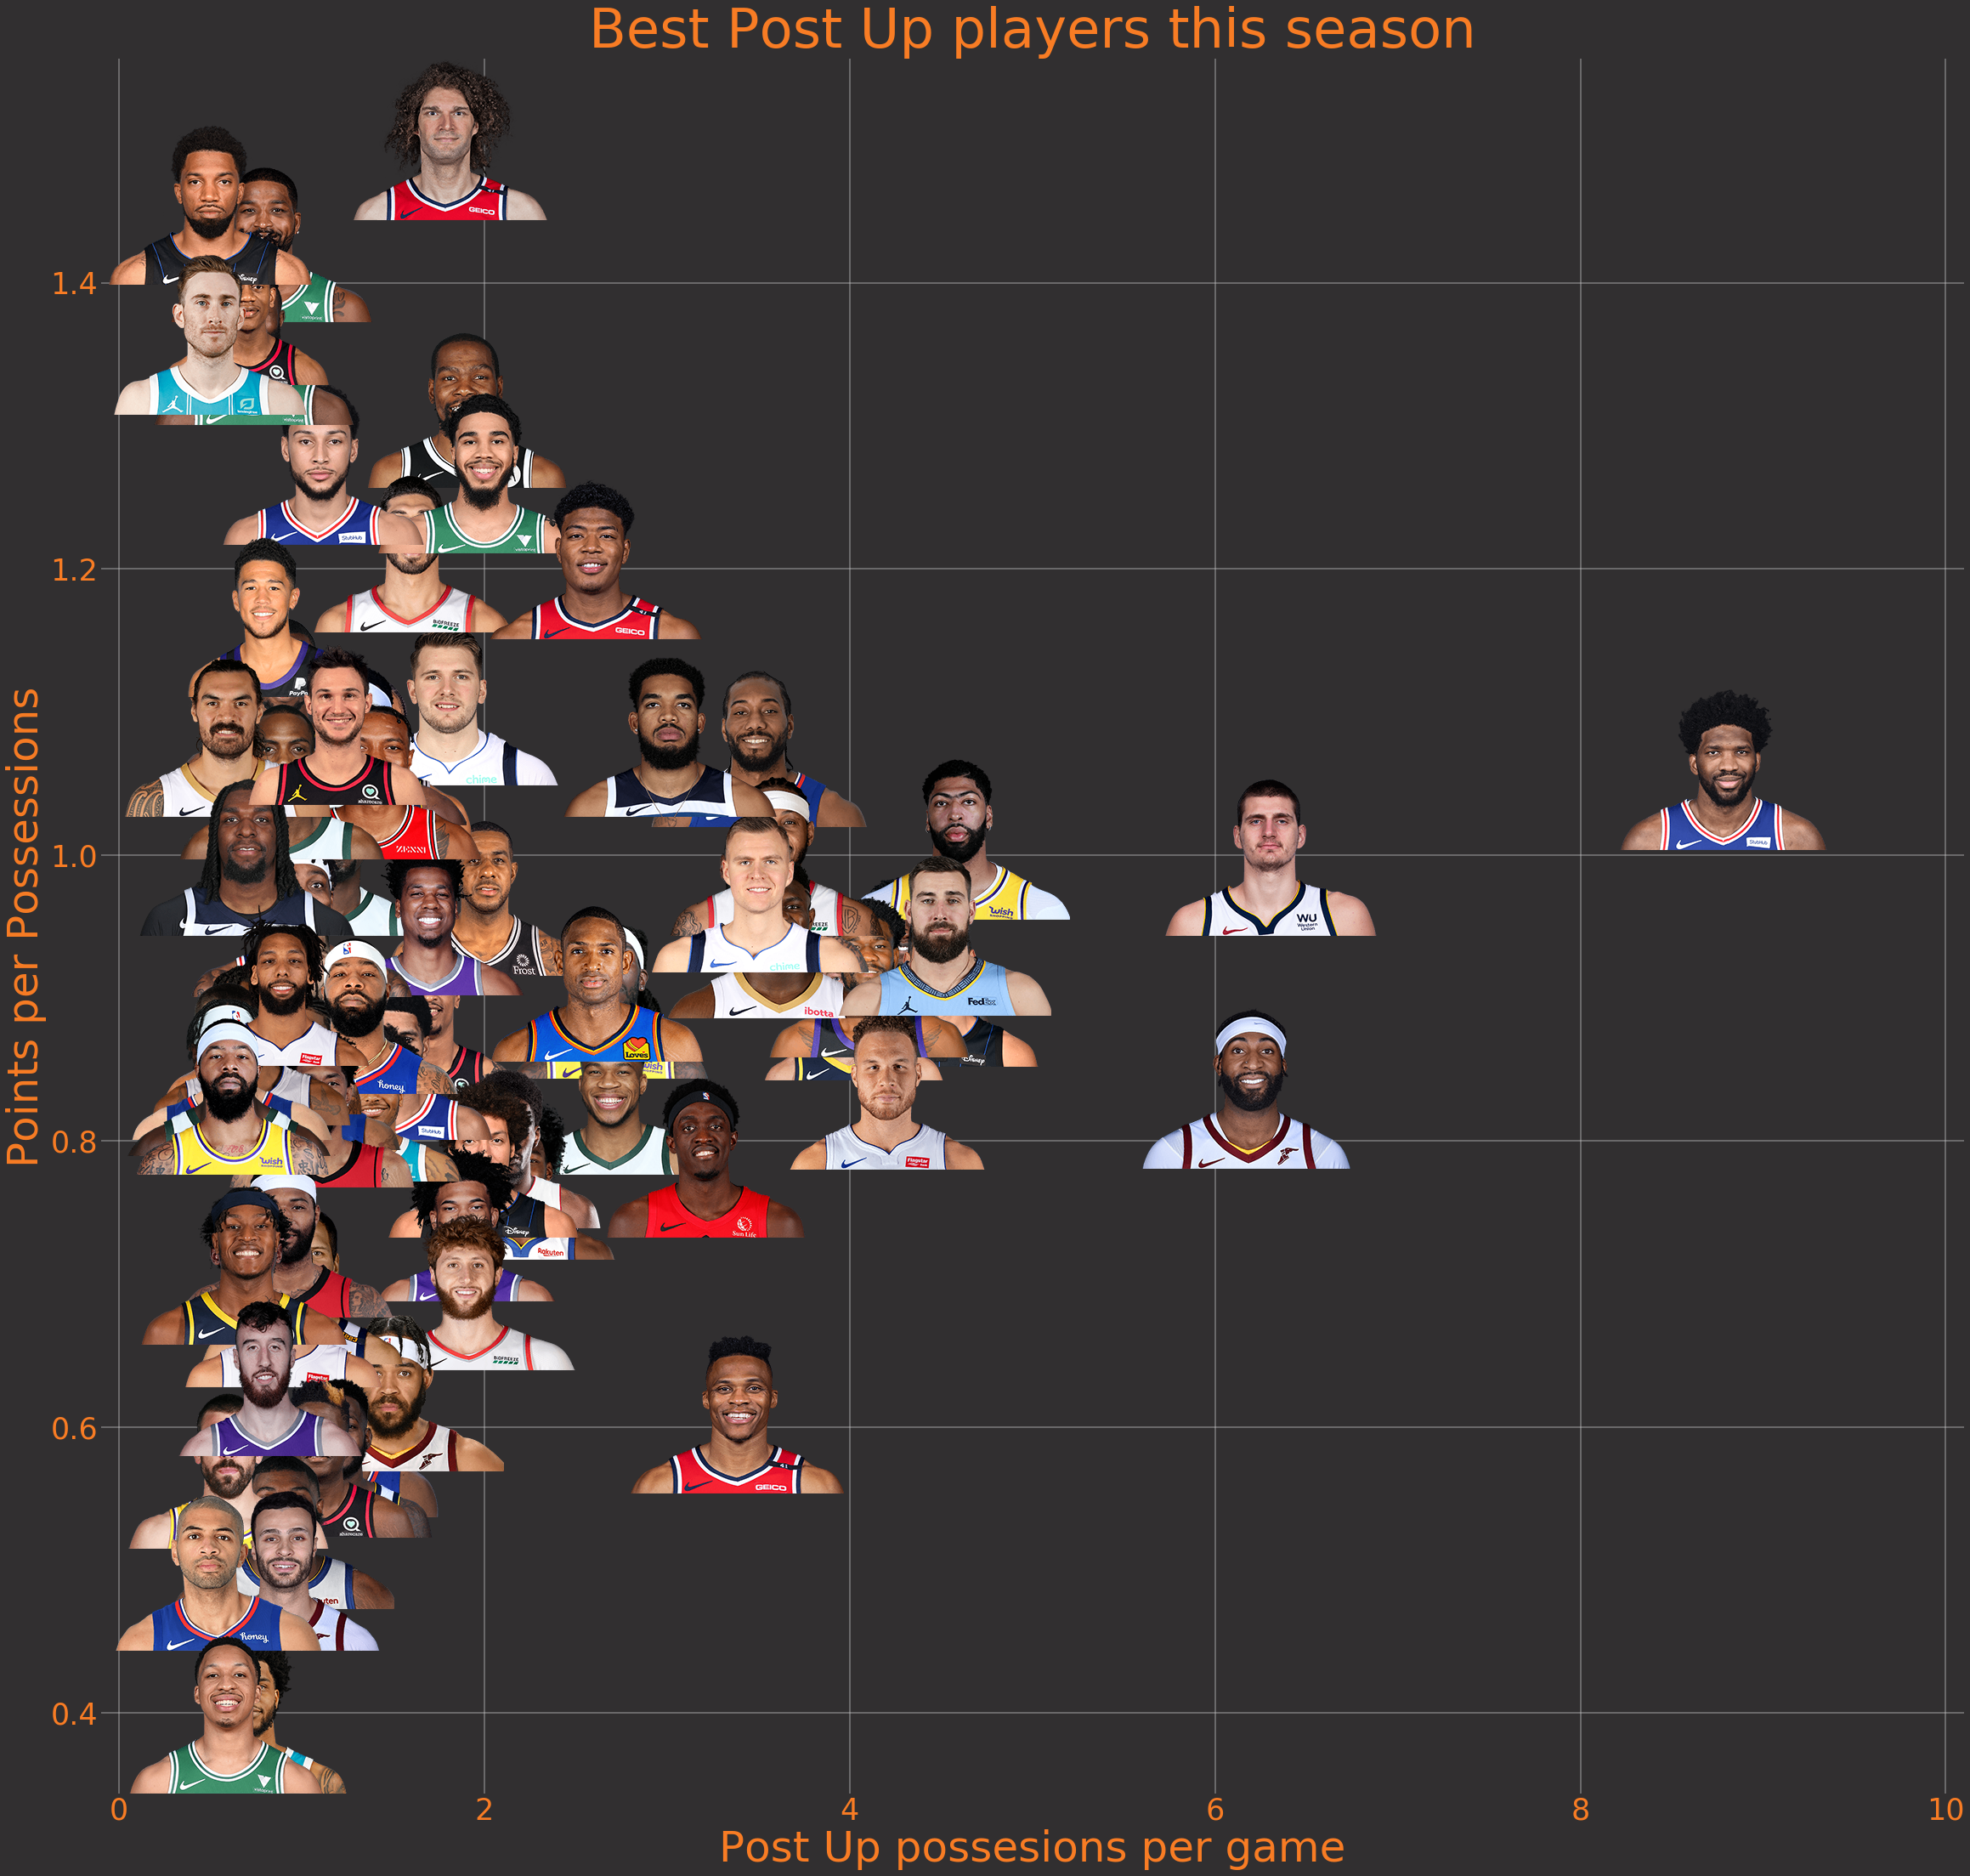

In [106]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def getImage(path):
    #print(path)
    return OffsetImage(plt.imread(path), zoom=1.0)

paths = []
for i in range(len(data_df)):
    item = data_df.iloc[i]
    paths.append(f'player_imgs/{item.PLAYER_ID}.png')

fig, ax = plt.subplots(figsize=(35, 35))
x = data_df.POSS.tolist()
y = data_df.PPP.tolist()
ax.scatter(x, y) 
ax.tick_params(labelsize=35, labelcolor=bball_orange)
ax.set_xlabel("Post Up possesions per game", size=50, color=bball_orange)
ax.set_ylabel("Points per Possessions", size=50, color=bball_orange)
ax.set_title("Best Post Up players this season", size=64, color=bball_orange)
ax.set_xlim(-0.1, 10.1)
ax.grid(b=True, alpha=0.5, lw=1.5)

for x0, y0, path in zip(x, y, paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)
    
    
ax.set_facecolor(bball_gray)
fig.set_facecolor(bball_gray)
ax.set_frame_on(False)
    
plt.savefig('post_ups_black.png', bbox_inches='tight', facecolor=fig.get_facecolor(), edgecolor='none')